# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_segment_skin.ipynb) and run.


In [1]:
# @title Notebook Inputs { display-mode: "form" }
# @markdown Input Image Path
# Path to the OCT image
if not 'oct_input_image_path' in globals():
  oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x Raw Data Used In Paper (Paper V2)/LE-03 - Slide04_Section01 (Fig 3.b)/OCTAligned.tiff" # @param {type:"string"}

## Set Up Environment

In [2]:
setup_env_oct2Hist_usemodel = True
!git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
%cd OCT2Hist-ModelInference

import cv2
import matplotlib.pyplot as plt
import numpy as np
import segment_skin_in_oct_images
from google.colab import drive
from utils.show_images import *
drive.mount('/content/drive/')

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 590, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 590 (delta 48), reused 1 (delta 0), pack-reused 504
Receiving objects: 100% (590/590), 20.24 MiB | 29.65 MiB/s, done.
Resolving deltas: 100% (305/305), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.        
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513        
Receiving objects: 100% (2513/2513), 8.20 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
/content/OCT2Hist-ModelInference
Mounted at /content/drive/


In [3]:
# Set up the network environment
segment_skin_in_oct_images.setup_network()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Run
In this step we load the OCT image, then crops it to the right size



In [4]:
# Load OCT image
oct_image = cv2.imread(oct_input_image_path)

# Segment
mask = segment_skin_in_oct_images.run_network(oct_image)

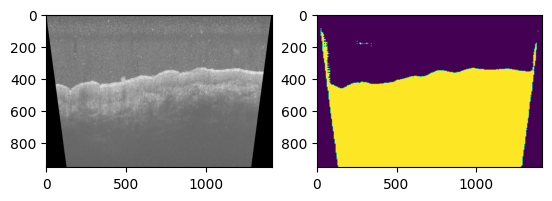

In [5]:
#@title Masked Image
showTwoImgs(oct_image, mask)